# RBM Baseline 200 Epochs

### Omniglot, binarized 


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_image(image): 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()

In [4]:
import rbm_datasets

In [5]:
train_x, train_y, train_char, test_x, test_y, test_char = rbm_datasets.load_omniglot_iwae()

In [6]:
from sklearn.preprocessing import binarize
X_train = binarize(train_x, threshold=0.5, copy=True)

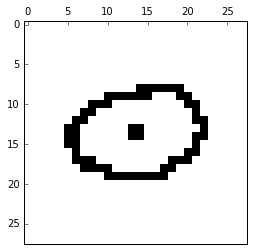

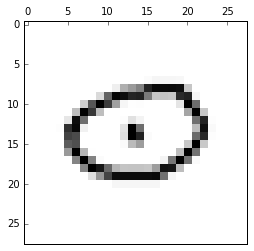

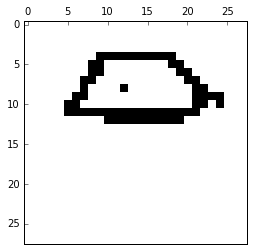

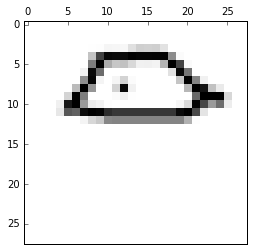

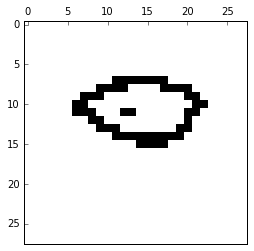

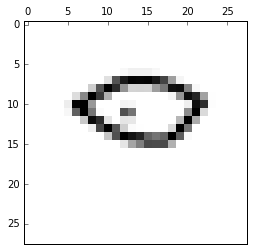

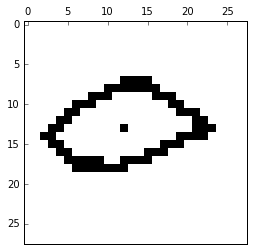

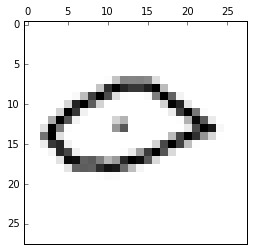

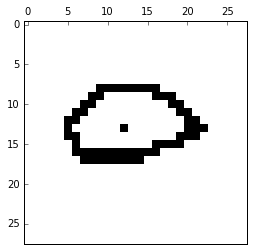

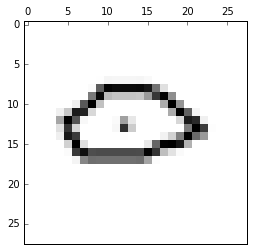

In [8]:
for i in range(5):
    show_image(X_train[i+100].reshape(28,28))
    show_image(train_x[i+100].reshape(28,28))

### Baseline

In [11]:
psutil.swap_memory()

sswap(total=6442450944L, used=5784207360L, free=658243584L, percent=89.8, sin=59425751040L, sout=409751552L)

In [13]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(verbose=True, n_iter=20)
print rbm
rbm= rbm.fit(X_train)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=256, n_iter=20,
       random_state=None, verbose=True)
[BernoulliRBM] Iteration 1, pseudo-likelihood = -110.25, time = 7.70s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -106.18, time = 8.67s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -99.86, time = 8.74s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -98.81, time = 8.72s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -92.03, time = 8.64s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -91.05, time = 8.65s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -91.02, time = 8.68s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -94.86, time = 8.65s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -93.91, time = 8.78s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -90.76, time = 8.74s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -96.04, time = 9.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -93.35, time = 9.31s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -9

In [14]:
from sklearn.preprocessing import binarize
X_test = binarize(test_x, threshold=0.5, copy=True)

In [15]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

F_train = rbm.transform(X_train)
F_test = rbm.transform(X_test)

for c in [0.01, 0.1, 1, 10, 100]:
    classifier = LinearSVC()
    classifier.fit(F_train, train_y)
    Y_test_rbm_pred = classifier.predict(F_test)
    emf_accuracy = accuracy_score(y_pred=Y_test_rbm_pred, y_true=test_y)
    print c, emf_accuracy